In [1]:
!pip install statsmodels
!pip install wquantiles

In [5]:
import kagglehub
import os

path = kagglehub.dataset_download("yasserh/wine-quality-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/yasserh/wine-quality-dataset/versions/1


In [8]:
directory_path = '/root/.cache/kagglehub/datasets/yasserh/wine-quality-dataset/versions/1'
files = os.listdir(directory_path)
print(files)

['WineQT.csv']


In [6]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
file_path = '/root/.cache/kagglehub/datasets/yasserh/wine-quality-dataset/versions/1/WineQT.csv'

df = pd.read_csv(file_path)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [15]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [19]:
promedio_acidez = df['fixed acidity'].mean()
print("El promedio de la acidez es: ", promedio_acidez)

El promedio de la acidez es:  8.311111111111112


In [20]:
promedio_acidez_trim = trim_mean(df['fixed acidity'], 0.1)
print("El promedio Trimeado es: ", promedio_acidez_trim)

El promedio Trimeado es:  8.133114754098361


In [21]:
media_ponderada = np.average(df['alcohol'], weights=df['fixed acidity'])
print("La media ponderada es: ", media_ponderada)

La media ponderada es:  10.425047194969613


<Axes: >

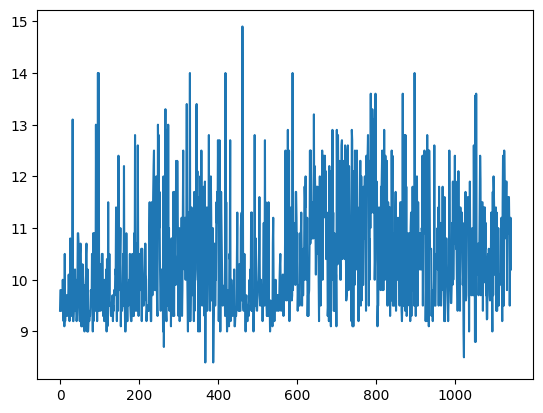

In [22]:
df['alcohol'].plot.line()

<ipython-input-24-58aa738e35e2>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.index, y=df['alcohol'], palette='coolwarm')


<Axes: xlabel='None', ylabel='alcohol'>

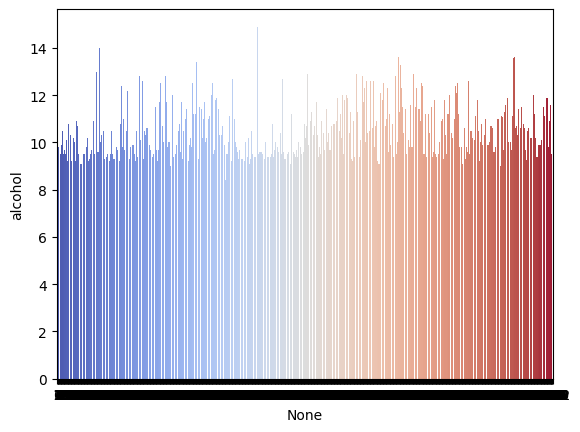

In [24]:
sns.barplot(x = df.index, y = df['alcohol'], palette='coolwarm')

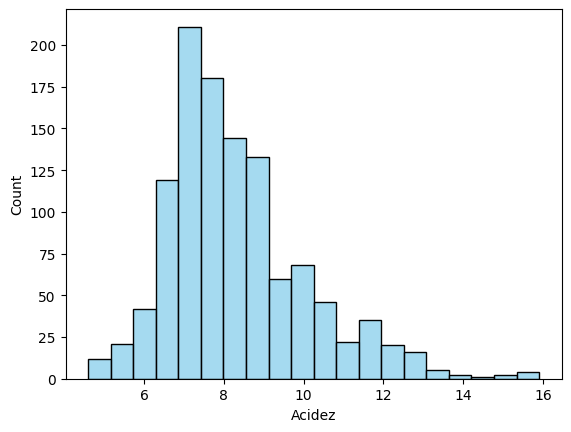

In [28]:
sns.histplot(df["fixed acidity"], kde=False, color='skyblue', bins=20)
plt.xlabel("Acidez")
plt.show()

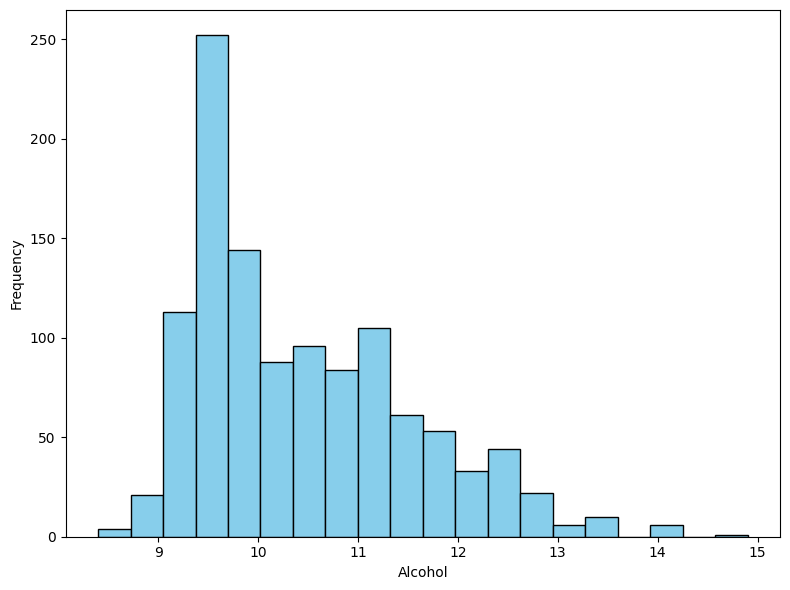

In [29]:
ax = df["alcohol"].plot.hist(figsize=(8, 6), bins=20, color='skyblue', edgecolor='black')
ax.set_xlabel("Alcohol")
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/distributions.py:2496: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an 

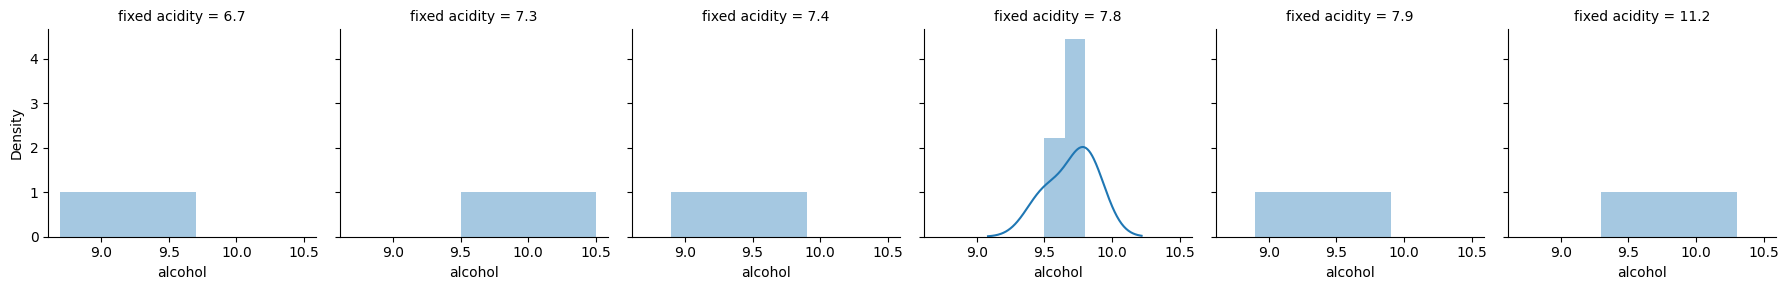

In [33]:
analisis = df.head(10)
g = sns.FacetGrid(analisis, col = "fixed acidity")
g.map(sns.distplot, "alcohol")

In [35]:
# Calcular la correlación entre 'fixed acidity' y 'alcohol'
correlation = df['fixed acidity'].corr(df['alcohol'])
print("La correlación entre acidez fija y alcohol es:", correlation)

La correlación entre acidez fija y alcohol es: -0.07505485317982825


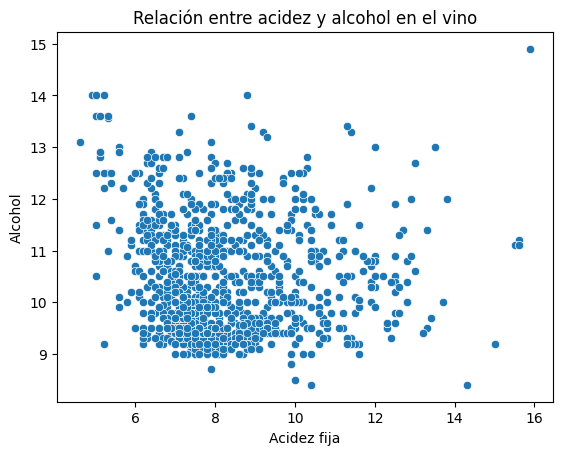

In [36]:
# Gráfico de dispersión para visualizar la relación entre acidez y alcohol
sns.scatterplot(x = 'fixed acidity', y = 'alcohol', data = df)
plt.title("Relación entre acidez y alcohol en el vino")
plt.xlabel("Acidez fija")
plt.ylabel("Alcohol")
plt.show()

In [37]:
# Calcular la mediana ponderada del alcohol utilizando 'fixed acidity' como pesos
weighted_median_alcohol = wquantiles.median(df['alcohol'], weights = df['fixed acidity'])
print("La mediana ponderada del alcohol es:", weighted_median_alcohol)

La mediana ponderada del alcohol es: 10.153237410071865


In [38]:
# Calcular la desviación absoluta mediana (MAD) de la acidez (una medida robusta de dispersión)
mad_acidity = robust.mad(df['fixed acidity'])
print("La desviación absoluta mediana (MAD) de la acidez es:", mad_acidity)

La desviación absoluta mediana (MAD) de la acidez es: 1.3343419966550423


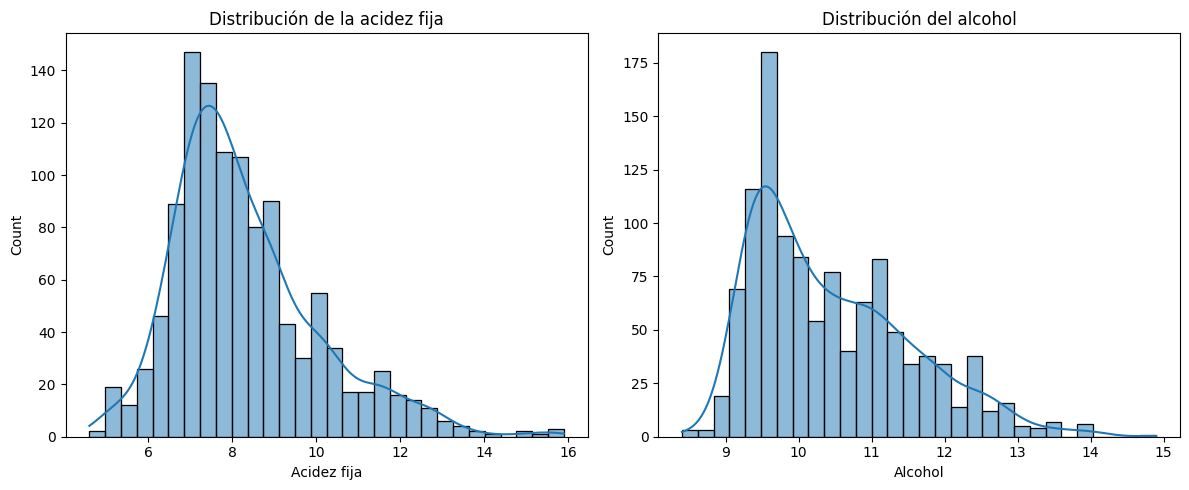

In [39]:
# Histograma y densidad de probabilidad para 'fixed acidity' y 'alcohol'
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['fixed acidity'], kde=True, bins=30)
plt.title("Distribución de la acidez fija")
plt.xlabel("Acidez fija")

plt.subplot(1, 2, 2)
sns.histplot(df['alcohol'], kde=True, bins=30)
plt.title("Distribución del alcohol")
plt.xlabel("Alcohol")

plt.tight_layout()
plt.show()

In [40]:
# Estadísticas descriptivas para 'fixed acidity' y 'alcohol'
desc_stats = df[['fixed acidity', 'alcohol']].describe()
print("Estadísticas descriptivas para acidez y alcohol:\n", desc_stats)

Estadísticas descriptivas para acidez y alcohol:
        fixed acidity      alcohol
count    1143.000000  1143.000000
mean        8.311111    10.442111
std         1.747595     1.082196
min         4.600000     8.400000
25%         7.100000     9.500000
50%         7.900000    10.200000
75%         9.100000    11.100000
max        15.900000    14.900000


In [42]:
# Regresión lineal simple: predecir el alcohol en función de la acidez fija
import statsmodels.api as sm

X = df['fixed acidity']
y = df['alcohol']
X = sm.add_constant(X)  # Añadimos la constante (intercepto)

modelo = sm.OLS(y, X).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                alcohol   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     6.464
Date:                Mon, 10 Mar 2025   Prob (F-statistic):             0.0111
Time:                        21:04:19   Log-Likelihood:                -1708.4
No. Observations:                1143   AIC:                             3421.
Df Residuals:                    1141   BIC:                             3431.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            10.8284      0.155     69.747

Con base en los resultados de la regresión lineal, podemos extraer las siguientes conclusiones principales:

**Relación lineal muy débil**

El valor de R^2 es aproximadamente 0.006 (0.6%), lo que indica que la acidez fija explica muy poca variabilidad en el contenido de alcohol.

En términos prácticos, esto significa que hay muchos otros factores dentro del dataset que influyen en el nivel de alcohol del vino.

**Pendiente negativa y significativa**

El coeficiente de la acidez fija es de alrededor de -0.0465 con un p-value de 0.011, por debajo del umbral típico de 0.05.

La significancia estadística indica que el efecto no es producto del azar, pero el efecto es pequeño: por cada aumento de 1 unidad en la acidez, el alcohol se reduce en tan solo 0.0465 unidades.

**Interpretación**

Aunque el coeficiente sea estadísticamente significativo, el tamaño del efecto (y la capacidad de predicción) es muy bajo.

En la práctica, la acidez fija no es un buen predictor del contenido de alcohol, por lo que sería necesario incluir otras variables (como el tipo de uva, la región, el proceso de fermentación, etc.) para explicar mejor el nivel de alcohol en el vino.

**Conclusión**

A partir del análisis que realizamos, se puede decir que existe una relación negativa leve entre la acidez y el alcohol, pero es tan pequeña que no resulta útil para predecir el alcohol de un vino basándonos solo en la acidez.